# BCI-Motor imagery Data Preprocessing

- Import data and check stimulus events

In [152]:
import mne
import numpy as np
raw_edf = mne.io.read_raw_edf("C:\git\Senior_Thesis\DataSet\Convert_data\class3_try_edf.edf",preload = True)

Extracting EDF parameters from C:\git\Senior_Thesis\DataSet\Convert_data\class3_try_edf.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 107749  =      0.000 ...   430.996 secs...


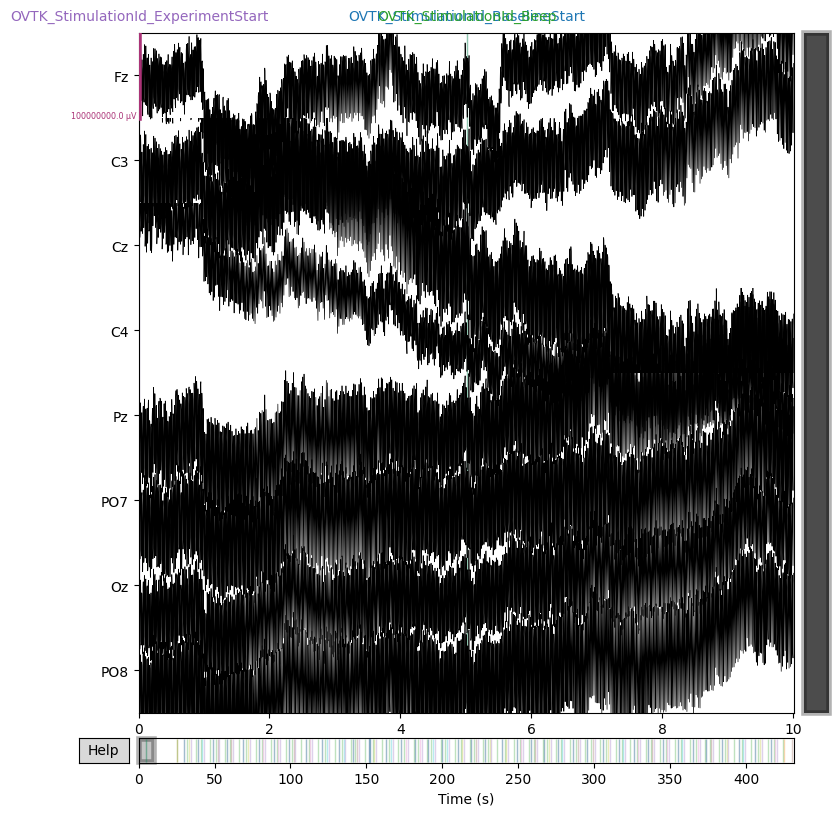

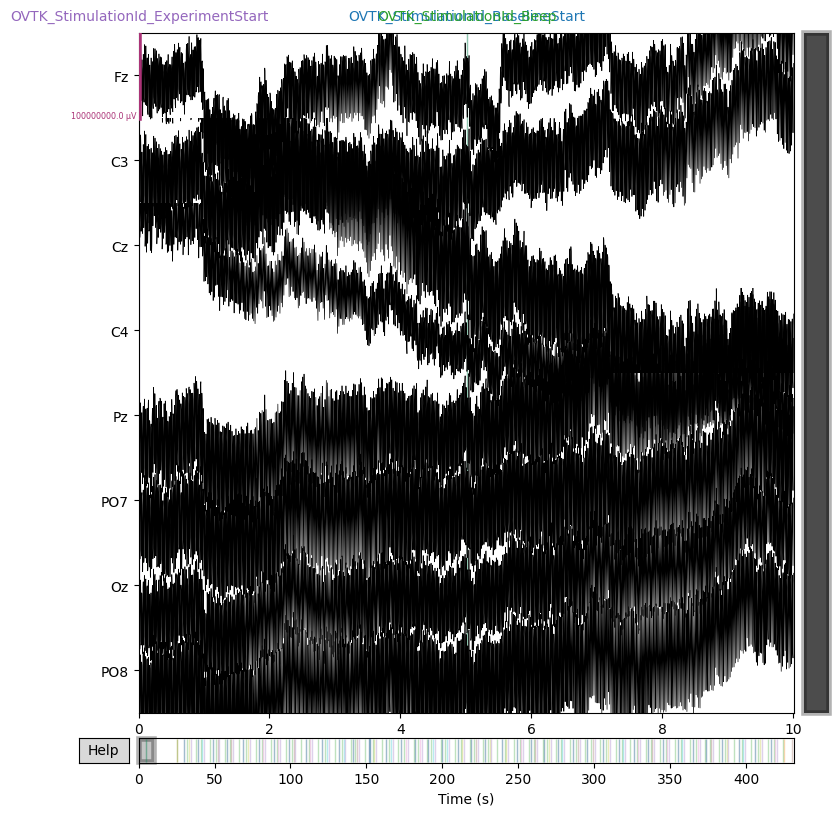

In [153]:
raw_edf.plot(
    duration=10, 
    start=0.0, 
    scalings=50, # You may edit scalings value later
    )

In [154]:
# raw_eeg = raw_edf.pick_channels(['C3','Cz','C4'])
# events, event_dict = mne.events_from_annotations(raw_eeg)
# print('Total events:', len(events))

- Digital Filter and Average Reference

In [155]:
filtered_eeg = raw_edf.copy().filter(l_freq=1.0, h_freq=30.0)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (3.300 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


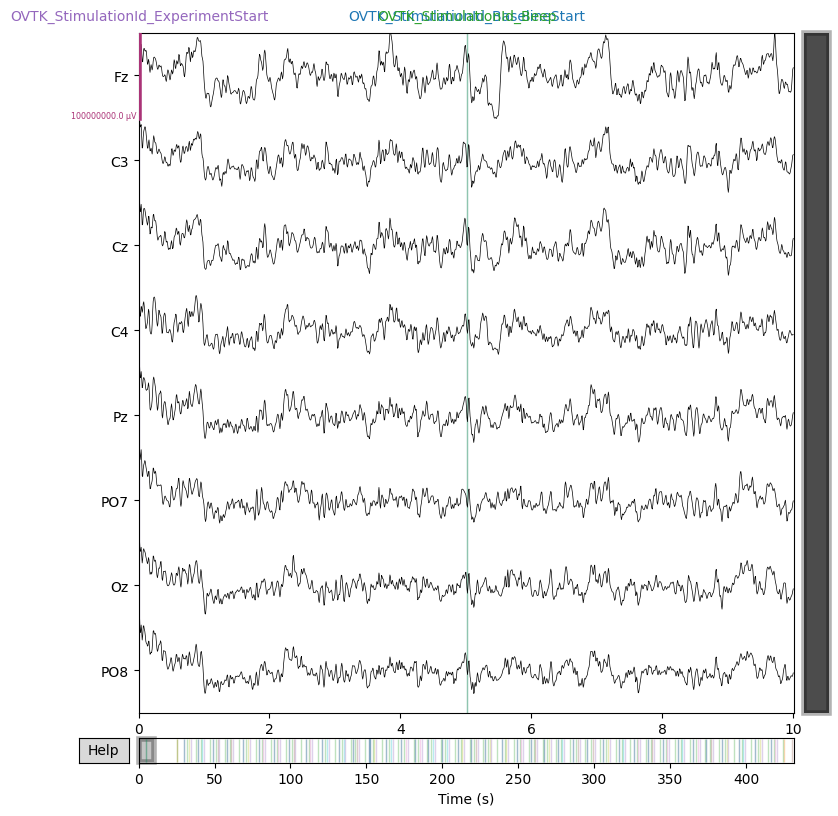

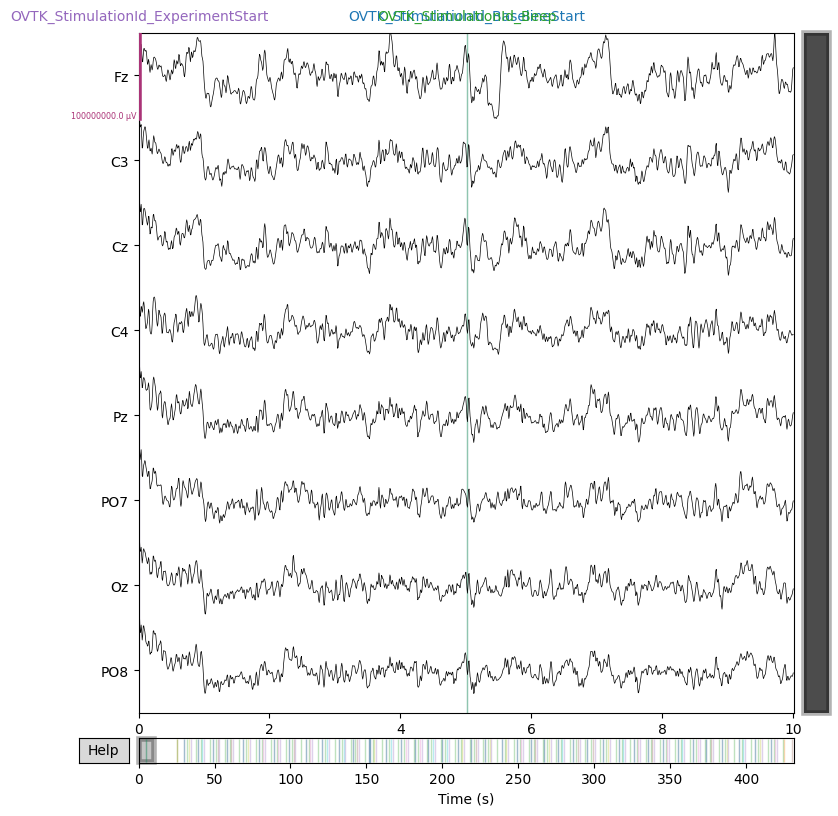

In [156]:
filtered_eeg.plot(
    duration=10, 
    start=0.0, 
    scalings=50, # You may edit scalings value later
    )

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


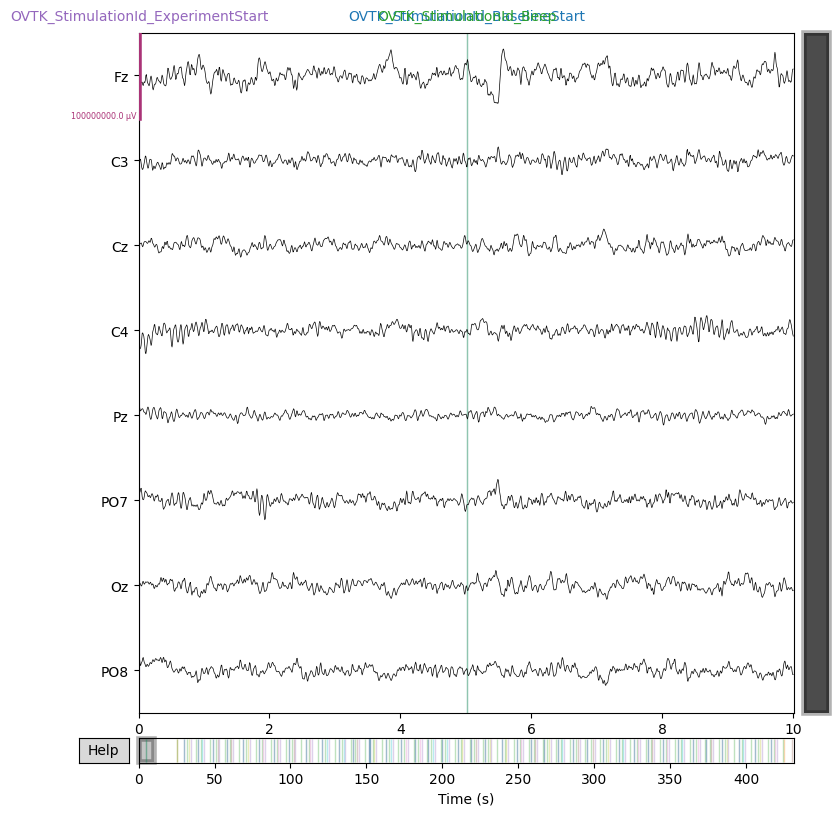

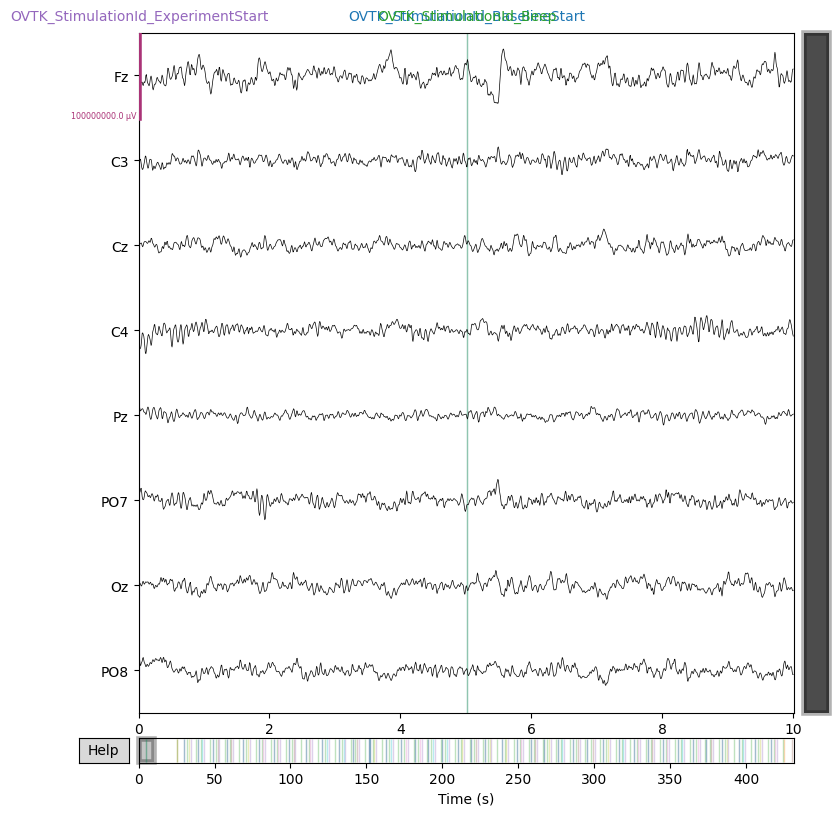

In [157]:
eeg_ref = filtered_eeg.copy().set_eeg_reference(ref_channels="average")
eeg_ref.plot(
    duration=10, 
    start=0.0, 
    scalings=50, # You may edit scalings value later
    )

In [158]:
max(eeg_ref[0][0][0])

570.8817813754906

- Artifacts Removal